In [1]:
# To classifiy digits using MNIST data
# MNIST is a pre stored data in keras under datasets package

In [51]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers , models
import numpy as np

In [52]:
train_data , test_data = datasets.mnist.load_data()

In [53]:
len(train_data) , len(test_data)

(2, 2)

In [54]:
len(train_data[0]) , len(train_data[1])  #Training data sample is 60000

(60000, 60000)

In [55]:
len(test_data[0]) , len(test_data[1])   # Testing data sample is 10000

(10000, 10000)

In [56]:
(x_train , y_train , x_test , y_test) = train_data[0] , train_data[1] , test_data[0] , test_data[1]

In [57]:


type(x_train)

numpy.ndarray

In [58]:
x_train.shape    # Each image is a 28 x 28 matrix respresentation ie; 2D

(60000, 28, 28)

In [59]:

x_test.shape     # Each image is a 28 x 28 matrix respresentation ie; 2D

(10000, 28, 28)

In [60]:
import matplotlib.pyplot as plt
import random

In [61]:
x_train[0].shape

(28, 28)

5
4
2
9
5


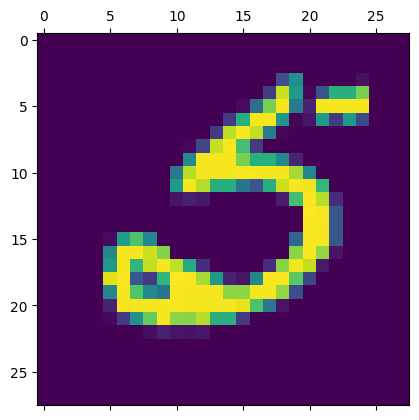

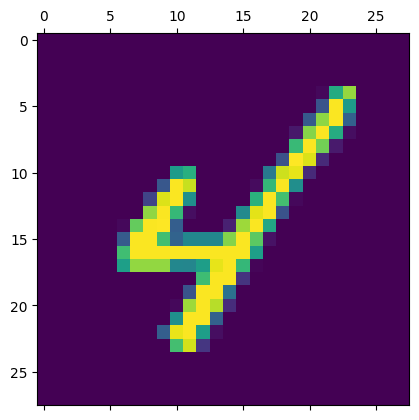

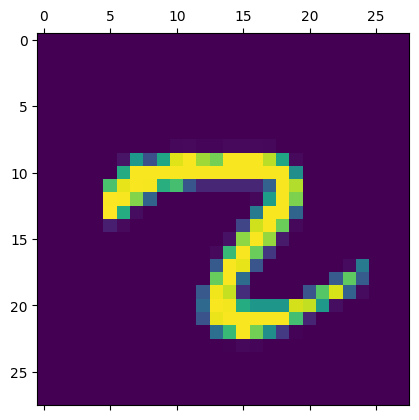

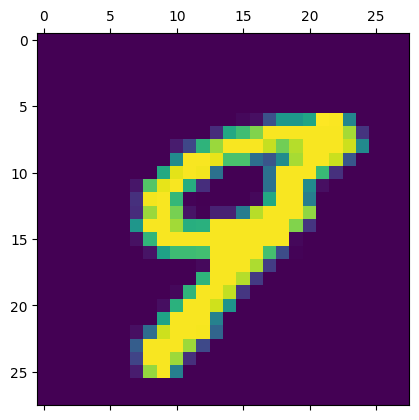

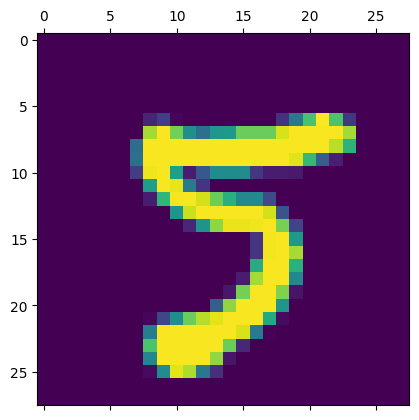

In [62]:
for i in range(5):
  image_no = random.randint(0 , 60001)
  image_matrix = x_train[image_no]
  print(y_train[image_no])
  plt.matshow(image_matrix)


In [63]:
#Flatten the image
#(60000 , 28 , 28) = (60000 , 784)


x_train_flattened = x_train.reshape(len(x_train) ,28*28)
x_test_flattened = x_test.reshape(len(x_test) , 28*28)


In [64]:
x_train_flattened.shape

(60000, 784)

In [65]:
x_test_flattened.shape

(10000, 784)

In [66]:
x_train_flattened[0].shape

(784,)

A Simple Neural Network for handwritten digit problem

In [67]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (748,) , activation = 'sigmoid')
]
)

In [68]:
model.compile(
    optimizer = 'adam' ,
    loss ='sparse_categorical_crossentropy' ,
    metrics = ['accuracy'])



In [69]:

model.fit(x_train_flattened , y_train , epochs = 10)

Epoch 1/10


ValueError: ignored

FEATURE SCALING : NORMALIZATION APPLIED

In [70]:
x_train = x_train/255.0
x_test = x_test/255.0

In [72]:
x_train_flattened = x_train.reshape(len(x_train) , 28*28)
x_test_flattened = x_test.reshape(len(x_test) , 28*28)

In [74]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation  = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [75]:
model.fit(x_train_flattened , y_train , epochs  =5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4694 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9256


In [77]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 945us/step - loss: 0.2675 - accuracy: 0.9263


[0.2674906849861145, 0.9262999892234802]

In [81]:
results = model.predict(x_test_flattened)

313/313 [==============================] - 0s 805us/step


In [83]:
results[0] # first test image result

array([1.77671704e-02, 4.89706565e-07, 7.39836618e-02, 9.38149750e-01,
       2.67582829e-03, 1.08969115e-01, 1.95074404e-06, 9.99781013e-01,
       6.38931245e-02, 6.29188418e-01], dtype=float32)

In [84]:
np.argmax(results[0] )   # return index of max value

7

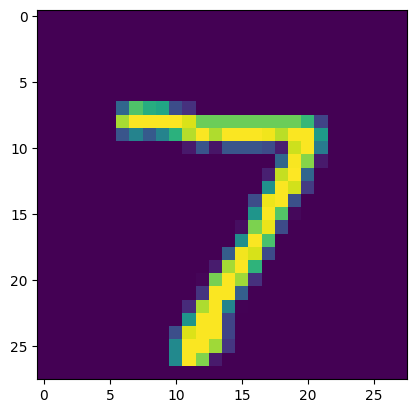

In [86]:
plt.imshow(x_test[0])

Confusion matrix

In [85]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [87]:
# Kindly convert the value of results in this way
prediction = [np.argmax(i) for i in results ]

In [89]:
prediction[:5]

[7, 2, 1, 0, 4]

In [91]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = prediction)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,   10,  944,   10,    9,    4,   12,    8,   27,    4],
       [   3,    0,   30,  907,    1,   32,    2,   10,   17,    8],
       [   1,    2,    6,    1,  925,    0,   10,    4,    9,   24],
       [   9,    3,    6,   23,   10,  793,   12,    4,   25,    7],
       [  10,    3,   11,    1,    7,   15,  908,    2,    1,    0],
       [   1,    9,   28,    4,    9,    1,    0,  947,    1,   28],
       [   7,   12,   10,   20,    9,   30,    9,   10,  859,    8],
       [  11,    7,    1,   10,   43,    9,    0,   24,    4,  900]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'y_test')

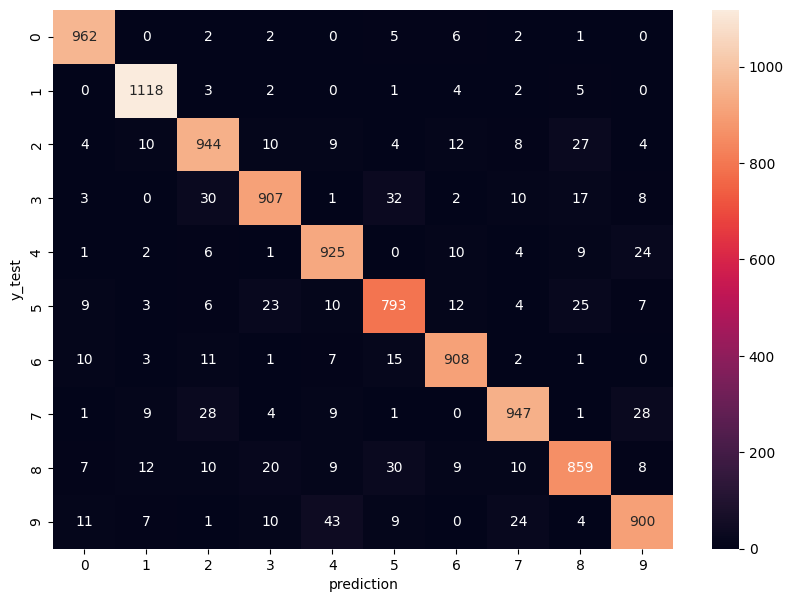

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot =True , fmt = 'd')
plt.xlabel('prediction')
plt.ylabel('y_test')

Let's add Hidden Layer

In [102]:
from tensorflow import keras

model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (748,) , activation = 'relu'),
    keras.layers.Dense(10 ,activation = 'sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [103]:
model2.fit(x_train_flattened , y_train , epochs = 5)

Epoch 1/5


ValueError: ignored